In [ ]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro # hypothesis testing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Linear Regression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Evaluation matrics for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Problem statement

# Data Gathering

In [159]:
df = pd.read_excel(r"C:\Users\yashraj\Desktop\itVedant\Machine Learning\Cell Phone Price prediction\Cellphone.xlsx")
df

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
0,2357,5.20,8,16.0,3.000,13.00,2610
1,1749,4.00,2,4.0,1.000,3.15,1700
2,1916,4.70,4,8.0,1.500,13.00,2000
3,1315,4.00,2,4.0,0.512,3.15,1400
4,1749,4.00,2,4.0,1.000,3.15,1700
...,...,...,...,...,...,...,...
156,3551,5.46,4,128.0,6.000,12.00,4080
157,3211,5.50,4,128.0,6.000,20.00,3400
158,3260,5.50,8,64.0,4.000,20.00,3000
159,3211,5.50,4,128.0,6.000,20.00,3400


# EDA (Exploratory Data Analysis)

In [160]:
df.shape

(161, 7)

In [161]:
# Checking info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   resoloution   161 non-null    float64
 2   cpu core      161 non-null    int64  
 3   internal mem  161 non-null    float64
 4   ram           161 non-null    float64
 5   RearCam       161 non-null    float64
 6   battery       161 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 8.9 KB


In [162]:
df.describe()

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,5.209938,4.857143,24.501714,2.204994,10.378261,2842.111801
std,768.187171,1.509953,2.444016,28.804773,1.609831,6.181585,1366.990838
min,614.000000,1.400000,0.000000,0.000000,0.000000,0.000000,800.000000
25%,1734.000000,4.800000,4.000000,8.000000,1.000000,5.000000,2040.000000
50%,2258.000000,5.150000,4.000000,16.000000,2.000000,12.000000,2800.000000
75%,2744.000000,5.500000,8.000000,32.000000,3.000000,16.000000,3240.000000
max,4361.000000,12.200000,8.000000,128.000000,6.000000,23.000000,9500.000000


In [163]:
# Checking for null values

df.isnull().sum()

Price           0
resoloution     0
cpu core        0
internal mem    0
ram             0
RearCam         0
battery         0
dtype: int64

In [164]:
# Checking for outliers

<Axes: >

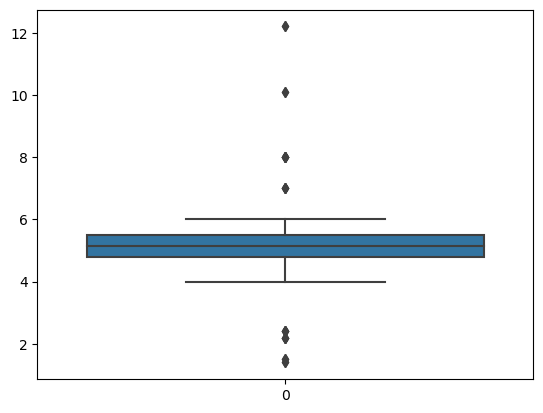

In [165]:
sns.boxplot(df["resoloution"])

In [166]:
# we have following outliers in resoloution column

q1r = df["resoloution"].quantile(.25)
q2r = df["resoloution"].quantile(.50)
q3r = df["resoloution"].quantile(.75)

iqr_r = q3r-q1r

lower_tailr = q1r-1.5*iqr_r
upper_tailr = q3r+1.5*iqr_r

In [167]:
df[df["resoloution"]<lower_tailr].shape

(12, 7)

In [168]:
# Outliers are :-
df[df["resoloution"]<lower_tailr]

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
81,791,1.5,1,0.000,0.004,0.0,800
86,791,1.5,1,0.000,0.004,0.0,800
101,833,2.4,0,0.000,0.008,0.0,1100
105,833,2.4,0,0.000,0.008,0.0,1100
110,754,2.4,0,0.004,0.004,0.0,850
113,754,2.4,0,0.004,0.004,0.0,850
125,705,2.2,0,0.128,0.032,2.0,900
126,705,2.2,0,0.128,0.032,2.0,900
140,628,2.2,0,0.256,0.128,1.3,950
141,628,2.2,0,0.256,0.128,1.3,950


In [169]:
df[df["resoloution"]>upper_tailr].shape

(14, 7)

In [170]:
df[df["resoloution"]>upper_tailr]

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
37,2124,10.1,4,16.0,2.000,5.00,7400
40,2124,10.1,4,16.0,2.000,5.00,7400
51,1347,7.0,2,4.0,0.512,2.00,2820
62,1347,7.0,2,4.0,0.512,2.00,2820
67,2044,8.0,8,8.0,2.000,5.00,4060
72,2044,8.0,8,8.0,2.000,5.00,4060
77,1396,7.0,4,4.0,1.000,3.00,3240
84,1646,8.0,4,8.0,1.000,5.00,4500
85,1396,7.0,4,4.0,1.000,3.00,3240
90,1646,8.0,4,8.0,1.000,5.00,4500


<Axes: >

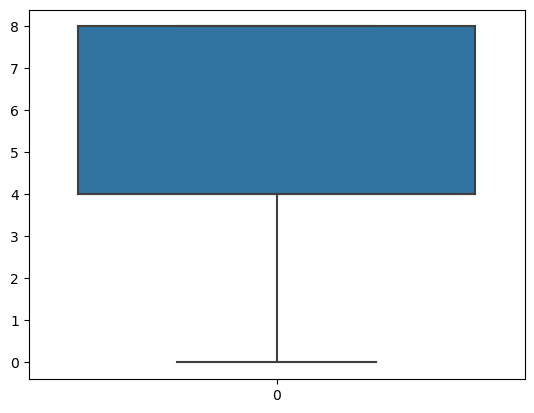

In [171]:
sns.boxplot(df["cpu core"])  # it has no outliers

<Axes: >

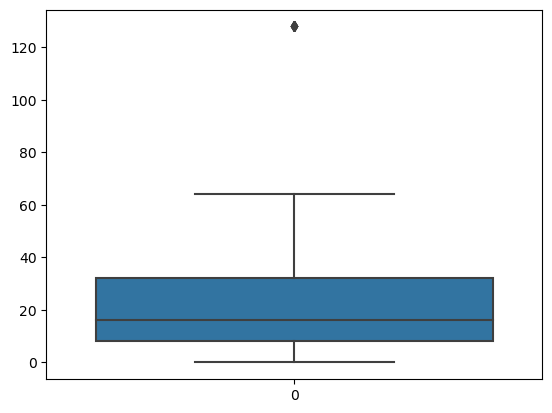

In [172]:
sns.boxplot(df["internal mem"])

In [173]:
# we have following outliers in internal mem column

q1i = df["internal mem"].quantile(.25)
q2i = df["internal mem"].quantile(.50)
q3i = df["internal mem"].quantile(.75)

iqr_i = q3i-q1i

lower_taili = q1i-1.5*iqr_i
upper_taili = q3i+1.5*iqr_i

df[df["internal mem"]>upper_taili]

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
83,3837,5.43,4,128.0,6.0,16.0,3600
87,3837,5.43,4,128.0,6.0,16.0,3600
152,4361,5.70,8,128.0,6.0,12.0,7000
153,4361,5.70,8,128.0,6.0,12.0,7000
155,3551,5.46,4,128.0,6.0,12.0,4080
156,3551,5.46,4,128.0,6.0,12.0,4080
157,3211,5.50,4,128.0,6.0,20.0,3400
159,3211,5.50,4,128.0,6.0,20.0,3400


<Axes: >

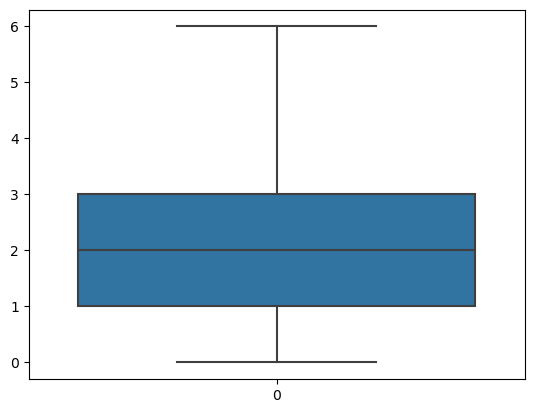

In [174]:
sns.boxplot(df["ram"]) # It has no outliers

<Axes: >

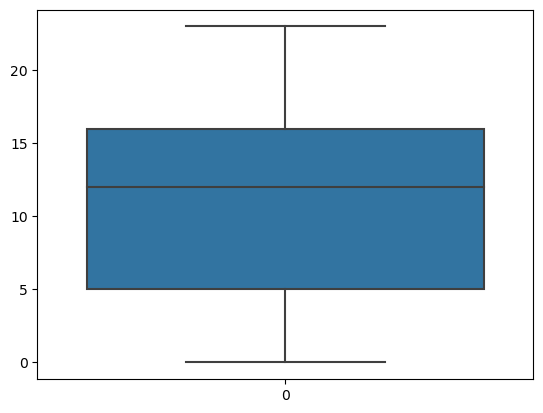

In [175]:
sns.boxplot(df["RearCam"])  # no outliers

<Axes: >

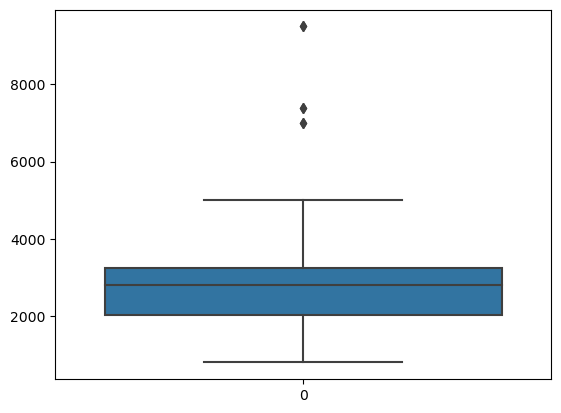

In [176]:
sns.boxplot(df["battery"])  # It has outliers only above upper tail

In [177]:
# finding outliers

q1b = df["battery"].quantile(.25)
q2b = df["battery"].quantile(.50)
q3b = df["battery"].quantile(.75)

iqr_b = q3b-q1b

upper_tailb = q3b+1.5*iqr_b
lower_tailb = q1b-1.5*iqr_b

In [178]:
df[df["battery"]>upper_tailb]

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
37,2124,10.1,4,16.0,2.0,5.0,7400
40,2124,10.1,4,16.0,2.0,5.0,7400
127,2491,12.2,8,32.0,3.0,8.0,9500
128,2491,12.2,8,32.0,3.0,8.0,9500
152,4361,5.7,8,128.0,6.0,12.0,7000
153,4361,5.7,8,128.0,6.0,12.0,7000


### Visualizing data

<Axes: xlabel='resoloution', ylabel='Density'>

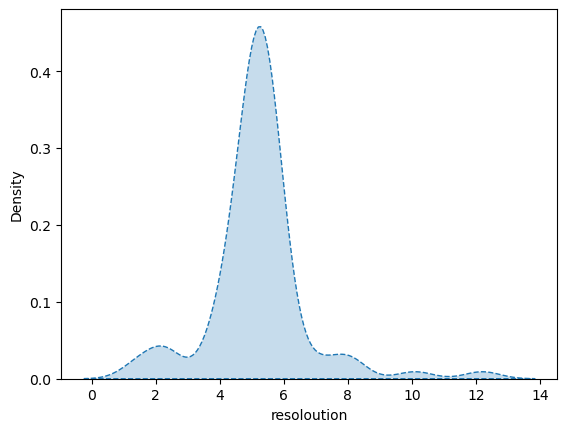

In [179]:
sns.kdeplot(df["resoloution"],fill=True,linestyle='--')

<Axes: xlabel='cpu core', ylabel='Count'>

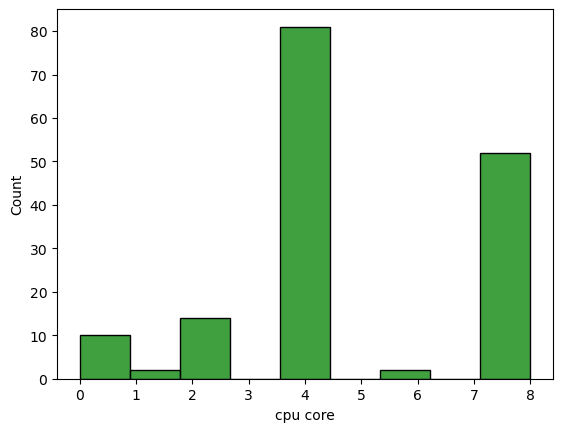

In [180]:
sns.histplot(df["cpu core"],color="green",edgecolor='black')

<Axes: xlabel='internal mem', ylabel='Count'>

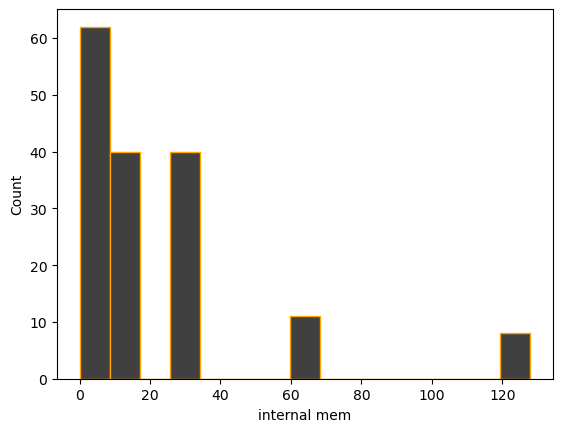

In [181]:
sns.histplot(df["internal mem"],color="black",edgecolor='orange')

<Axes: xlabel='ram', ylabel='Density'>

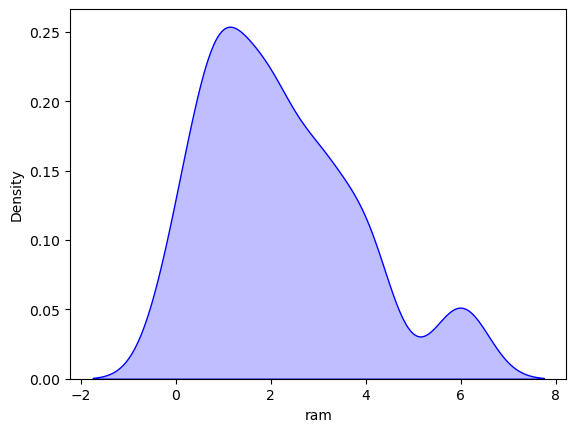

In [182]:
sns.kdeplot(df["ram"],fill=True,color="blue")

<Axes: xlabel='RearCam', ylabel='Count'>

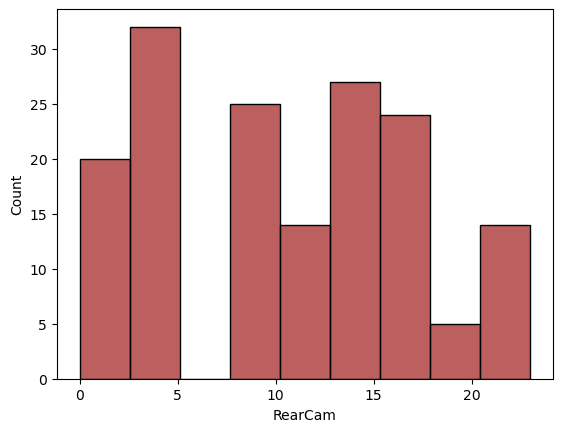

In [183]:
sns.histplot(df["RearCam"],color='brown',edgecolor='black')

<Axes: xlabel='battery', ylabel='Density'>

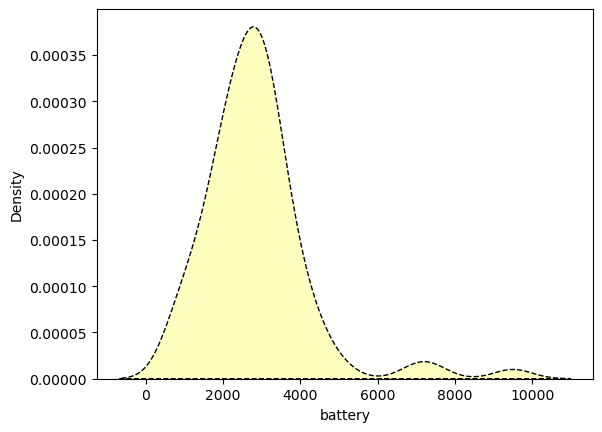

In [184]:
sns.kdeplot(df["battery"],fill=True,color='yellow',edgecolor='black',linestyle='--')

In [185]:
# Skewness

In [186]:
skew = df.skew
skew()

Price           0.052347
resoloution     1.176110
cpu core       -0.009077
internal mem    2.389683
ram             0.792698
RearCam         0.106929
battery         2.092660
dtype: float64

# Feature Engineering

In [187]:
df.info()  # All the data is already in numerical values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   resoloution   161 non-null    float64
 2   cpu core      161 non-null    int64  
 3   internal mem  161 non-null    float64
 4   ram           161 non-null    float64
 5   RearCam       161 non-null    float64
 6   battery       161 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 8.9 KB


In [188]:
df.isnull().sum()  # No missing values to correct


Price           0
resoloution     0
cpu core        0
internal mem    0
ram             0
RearCam         0
battery         0
dtype: int64

In [189]:
# Handling the outliers in "resoloution" column

mean_without_outliers_r = df[(df["resoloution"] < upper_tailr) & (df["resoloution"] > lower_tailr)]["resoloution"].mean()
mean_without_outliers_r

5.140740740740741

In [190]:
# outliers :-

df[(df["resoloution"] > upper_tailr) | (df["resoloution"] < lower_tailr)]["resoloution"]

37     10.1
40     10.1
51      7.0
62      7.0
67      8.0
72      8.0
77      7.0
81      1.5
84      8.0
85      7.0
86      1.5
90      8.0
93      8.0
95      8.0
101     2.4
105     2.4
110     2.4
113     2.4
125     2.2
126     2.2
127    12.2
128    12.2
140     2.2
141     2.2
149     1.4
150     1.4
Name: resoloution, dtype: float64

<Axes: >

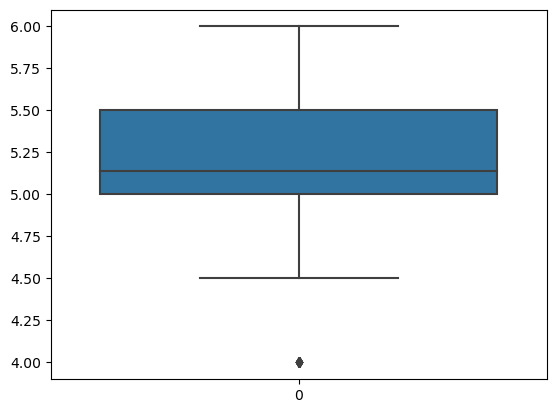

In [191]:
# Replacing the outlliers in "resoloution" with the mean value.

df.loc[df["resoloution"] < lower_tailr, "resoloution"] = mean_without_outliers_r  # .loc is used for label based indexing.
df.loc[df["resoloution"] > upper_tailr, "resoloution"] = mean_without_outliers_r  #  code:- .loc[row_label,column_label]=new_value



sns.boxplot(df["resoloution"])   # replaced the outliers with mean values

In [192]:
# Handling the outliers in "Internal mem" column

mean_without_outliers_i = df[df["internal mem"] < upper_tailb]["internal mem"].mean()
mean_without_outliers_i

24.501714285714286

In [193]:
df[(df["internal mem"] > upper_taili)]

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
83,3837,5.43,4,128.0,6.0,16.0,3600
87,3837,5.43,4,128.0,6.0,16.0,3600
152,4361,5.70,8,128.0,6.0,12.0,7000
153,4361,5.70,8,128.0,6.0,12.0,7000
155,3551,5.46,4,128.0,6.0,12.0,4080
156,3551,5.46,4,128.0,6.0,12.0,4080
157,3211,5.50,4,128.0,6.0,20.0,3400
159,3211,5.50,4,128.0,6.0,20.0,3400


<Axes: >

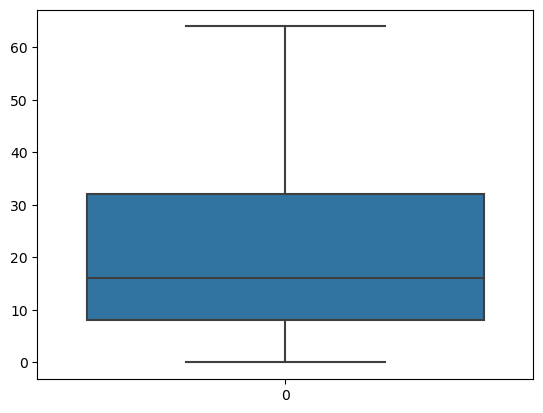

In [194]:
# Replacing the outlliers in "internal mem" with the mean value.

df.loc[df["internal mem"] > upper_taili, "internal mem"] = mean_without_outliers_i     # .loc is used for label based indexing.
                                                                                    #code :- .loc[row_label,column_label]=new_value

sns.boxplot(df["internal mem"])    # Result

In [195]:
# Handling outliers in "battery" column


mean_without_outliers_b = df[df["battery"] < upper_tailb]["battery"].mean()
mean_without_outliers_b

2643.7419354838707

In [196]:
df[(df["battery"] > upper_tailb)]

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
37,2124,5.140741,4,16.000000,2.0,5.0,7400
40,2124,5.140741,4,16.000000,2.0,5.0,7400
127,2491,5.140741,8,32.000000,3.0,8.0,9500
128,2491,5.140741,8,32.000000,3.0,8.0,9500
152,4361,5.700000,8,24.501714,6.0,12.0,7000
153,4361,5.700000,8,24.501714,6.0,12.0,7000


<Axes: >

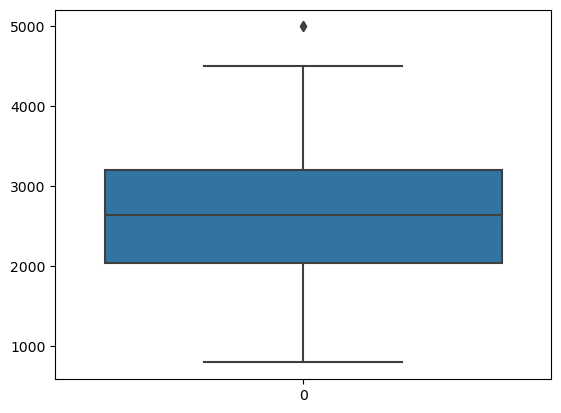

In [197]:
# Replacing the outlliers in battery with the mean value.

df.loc[df["battery"] < lower_tailb, "battery"] = mean_without_outliers_b  # .loc is used for label based indexing.
df.loc[df["battery"] > upper_tailb, "battery"] = mean_without_outliers_b  #  code :- .loc[row_label,column_label]=new_value

sns.boxplot(df["battery"])    # Result

In [198]:
# Stats
df.describe()

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,5.140741,4.857143,19.358942,2.204994,10.378261,2643.741935
std,768.187171,0.465666,2.444016,16.355634,1.609831,6.181585,894.801583
min,614.000000,4.000000,0.000000,0.000000,0.000000,0.000000,800.000000
25%,1734.000000,5.000000,4.000000,8.000000,1.000000,5.000000,2040.000000
50%,2258.000000,5.140741,4.000000,16.000000,2.000000,12.000000,2643.741935
75%,2744.000000,5.500000,8.000000,32.000000,3.000000,16.000000,3200.000000
max,4361.000000,6.000000,8.000000,64.000000,6.000000,23.000000,5000.000000


# Feature Selection

In [199]:
# assumption 1) Checking Linearity :-

df.corr()

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
Price,1.000000,0.500871,0.686811,0.740085,0.896915,0.739538,0.659058
resoloution,0.500871,1.000000,0.405242,0.448250,0.494775,0.546918,0.514077
cpu core,0.686811,0.405242,1.000000,0.468026,0.483128,0.611353,0.524209
internal mem,0.740085,0.448250,0.468026,1.000000,0.795753,0.559334,0.568877
ram,0.896915,0.494775,0.483128,0.795753,1.000000,0.648073,0.644190
RearCam,0.739538,0.546918,0.611353,0.559334,0.648073,1.000000,0.518398
battery,0.659058,0.514077,0.524209,0.568877,0.644190,0.518398,1.000000


<Axes: >

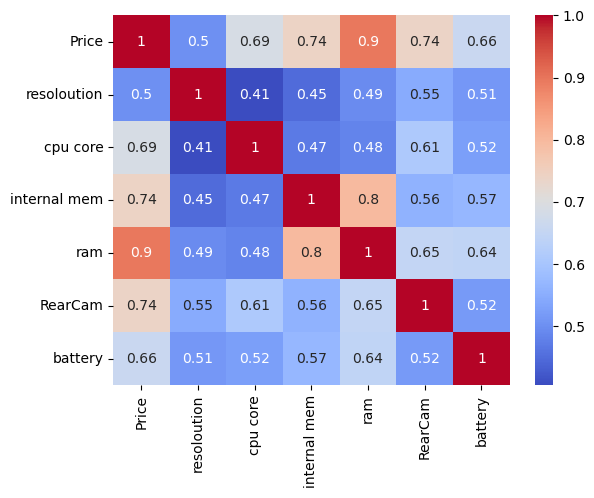

In [200]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

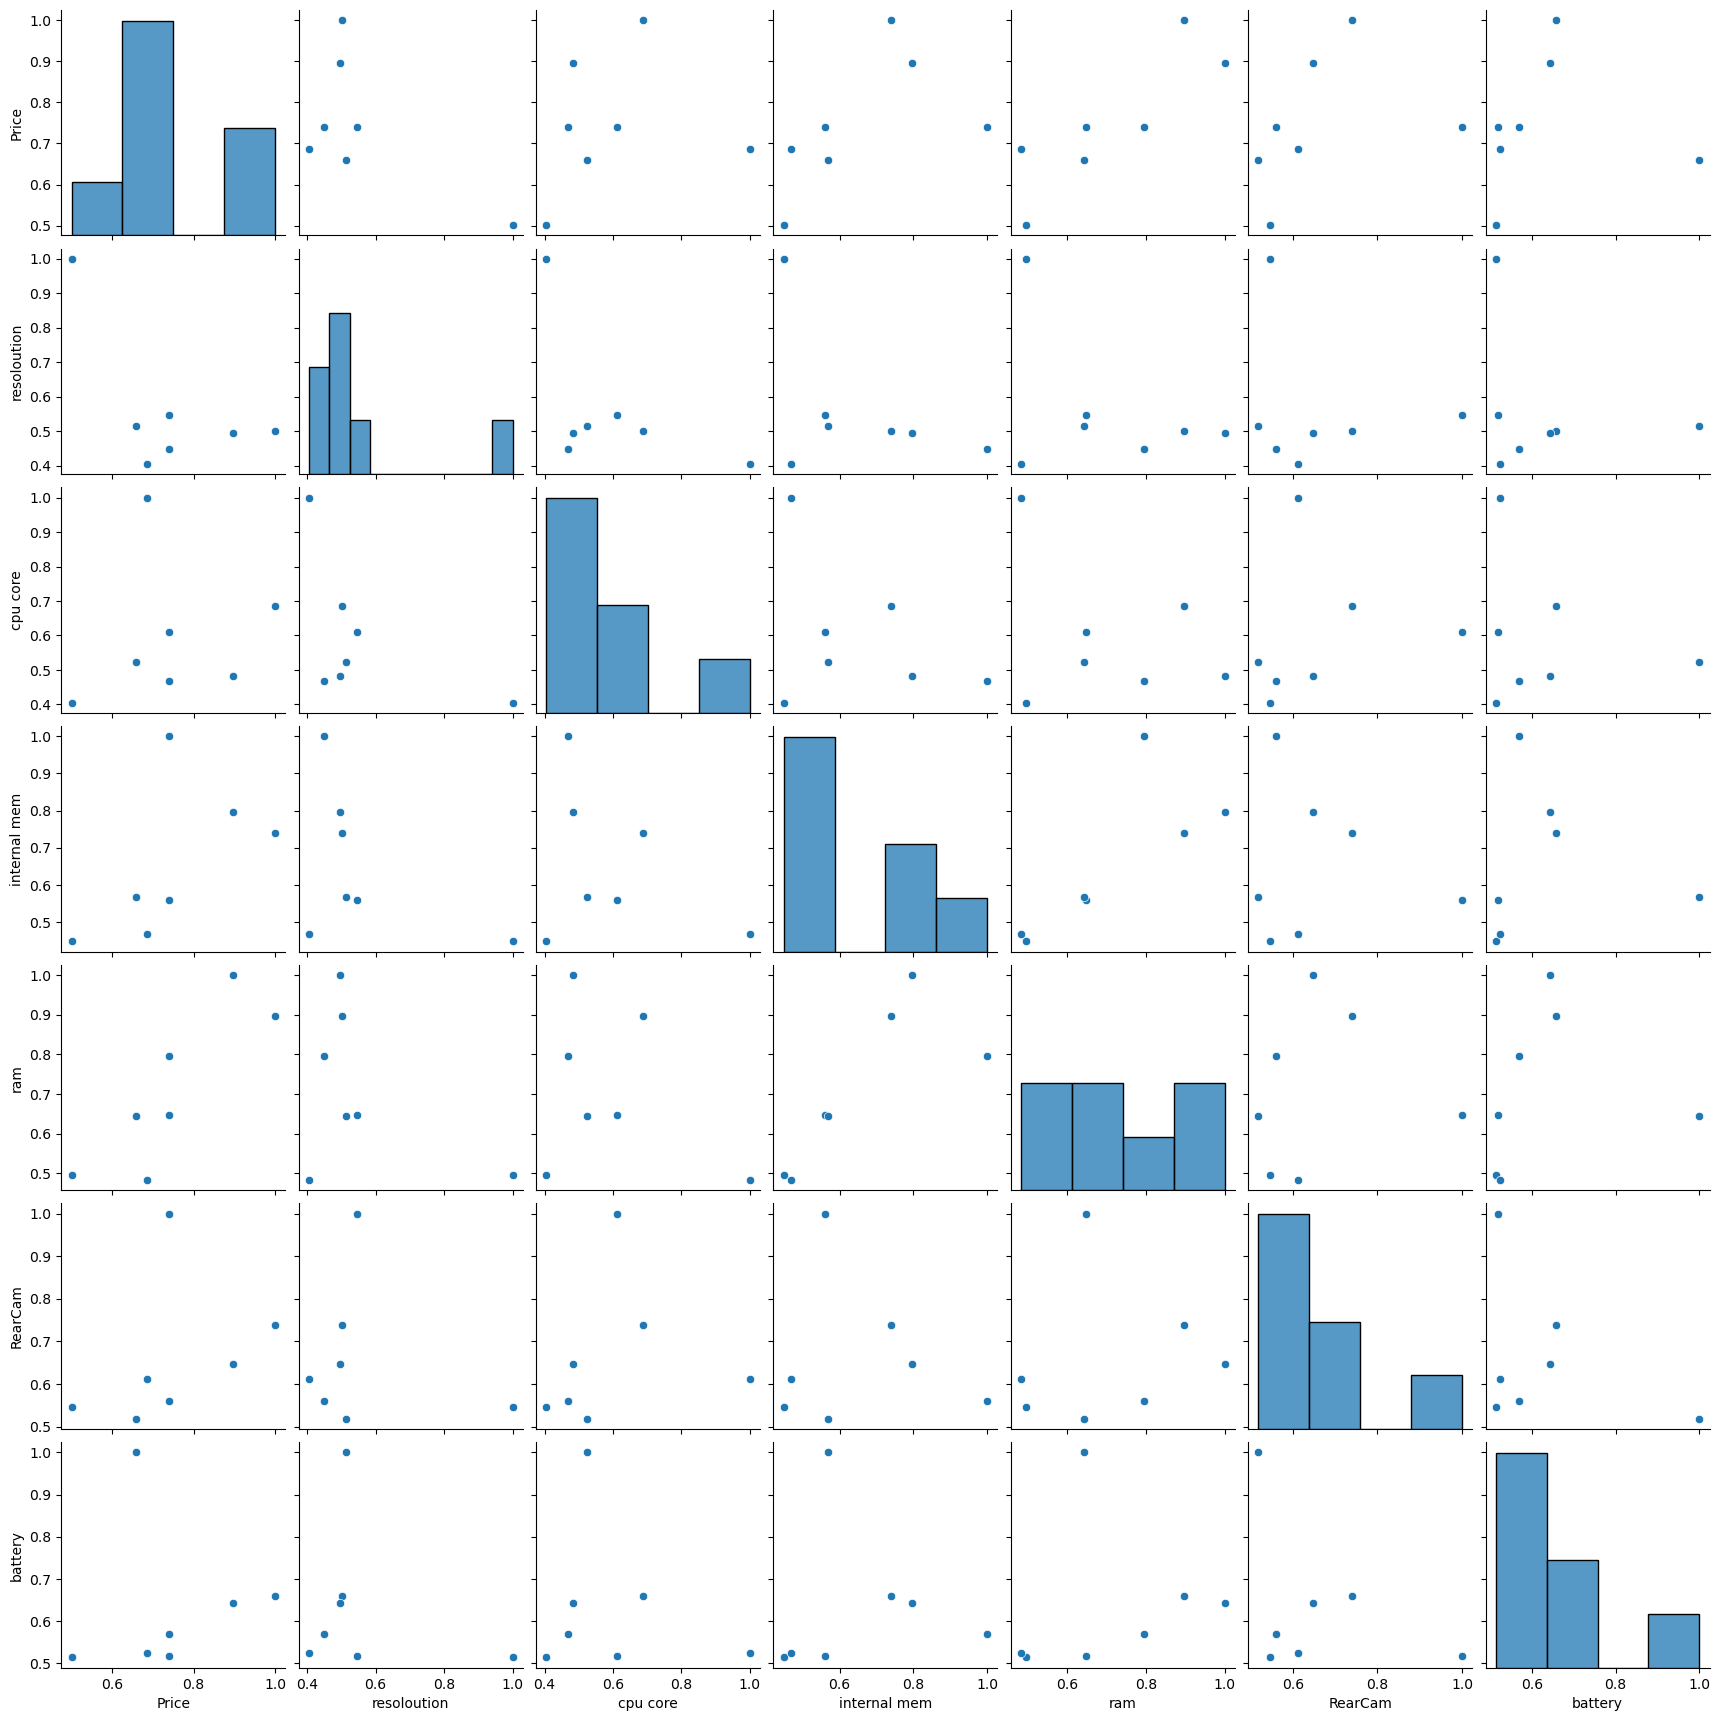

In [93]:
sns.pairplot(df.corr())

In [201]:
# Assumption 2) No multicolinearity :-


vif_df = df.iloc[:,1:]
vif_df

,resoloution,cpu core,internal mem,ram,RearCam,battery
0,5.20,8,16.000000,3.000,13.00,2610.0
1,4.00,2,4.000000,1.000,3.15,1700.0
2,4.70,4,8.000000,1.500,13.00,2000.0
3,4.00,2,4.000000,0.512,3.15,1400.0
4,4.00,2,4.000000,1.000,3.15,1700.0
...,...,...,...,...,...,...
156,5.46,4,24.501714,6.000,12.00,4080.0
157,5.50,4,24.501714,6.000,20.00,3400.0
158,5.50,8,64.000000,4.000,20.00,3000.0
159,5.50,4,24.501714,6.000,20.00,3400.0


In [202]:
vif_data = pd.DataFrame()

vif_data["features"] = vif_df.columns
vif_data

,features
0,resoloution
1,cpu core
2,internal mem
3,ram
4,RearCam
5,battery


In [203]:
vif_list = []

for i in range(vif_df.shape[1]):
    vif = variance_inflation_factor(vif_df.to_numpy(),i)
    vif_list.append(vif)
    
vif_data["vif"] = vif_list
vif_data

,features,vif
0,resoloution,13.762475
1,cpu core,8.850542
2,internal mem,6.764440
3,ram,10.369532
4,RearCam,8.447867
5,battery,19.820745


In [204]:
# Splitting the data

x = df.iloc[:,1:]
y = df["Price"]

In [205]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

# Algorithm 1) Linear Regression

# Model Training

In [206]:
lin_model = LinearRegression()
lin_model

LinearRegression()

In [207]:
final_model = lin_model.fit(xtrain,ytrain)
final_model

LinearRegression()

In [208]:
# Assumption 3) Normality of residual :-

y_train_predict = final_model.predict(xtrain)
y_train_predict

array([2321.64759405, 3119.54647524, 2116.67437965,  845.45766714,
       1743.88383812, 3401.02783968, 1357.92137709, 2795.10263993,
       2458.93073851, 3401.02783968, 2188.00875013, 1415.59299989,
       1484.38833094, 2025.16154652, 3507.91326339, 1792.37744887,
       1805.50947889,  844.18200257, 3675.53192801, 2731.2085926 ,
       2053.51753008,  853.08176311,  853.08176311, 1357.92137709,
       2994.44540385, 3119.64469623, 1805.50947889, 1269.49306377,
       1497.51380703, 1642.4962972 , 1414.06035536, 2783.60184031,
       1856.70798997, 2170.18825304, 1700.30366682, 1509.19519104,
       2677.97564878, 1711.26772515, 1257.0787037 , 2708.98340641,
       3363.36122498, 3363.36122498, 2170.18825304,  932.92024056,
       2471.62733161, 2542.94661317, 2938.92558369, 2471.62733161,
       1285.60981848, 2938.92558369, 2483.39866089, 1996.58492924,
       1497.51380703, 2778.02257887, 3246.76037216, 1444.13066859,
       2994.44540385, 1637.59064709, 1628.92289604, 1662.67611

In [209]:
residual = ytrain - y_train_predict
residual

43    -234.647594
20    -681.546475
16     141.325620
113    -91.457667
107    -67.883838
          ...    
128   -186.975649
125   -191.077356
102    -17.492944
67    -309.151708
72    -309.151708
Name: Price, Length: 128, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

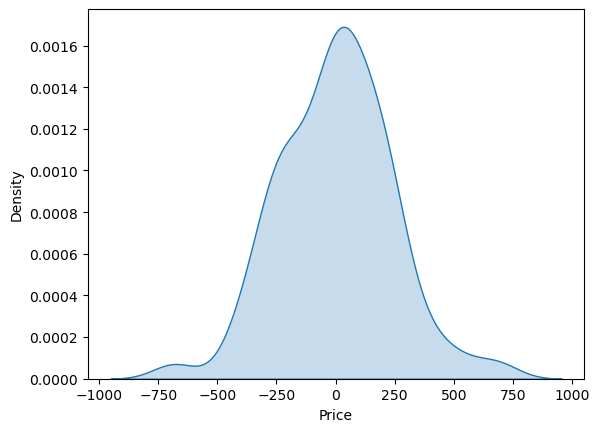

In [210]:
sns.kdeplot(residual,fill=True)  # Data is spread around the mean

In [211]:
stats, p_val = shapiro(residual)
print(stats,p_val)

if p_val >= 0.05:
    print("data is normally distributed")
    print("null hypothesis H0 is true")
else:
    print("data is not normally distributed")
    print("alternative hypothesis H1 is true")

0.9853729605674744 0.1863652616739273
data is normally distributed
null hypothesis H0 is true


In [212]:
#Assumption 4) Homoscadasticity :-

#error variance should be constant

<Axes: ylabel='Price'>

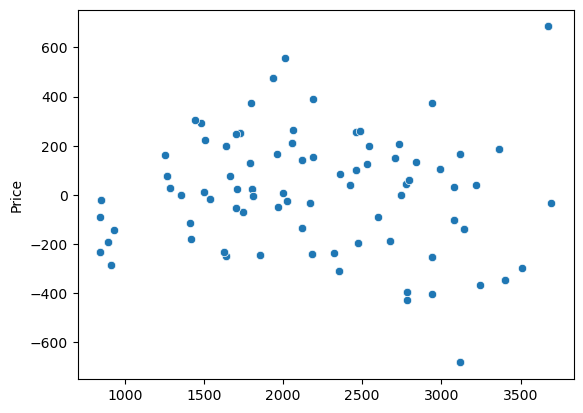

In [213]:
sns.scatterplot(x=y_train_predict,y=residual)  # It represents the spread or dispersion of the residuals,
                                              # indicating how much individual observations deviate from the predicted values.

# Model Evaluation

In [214]:
# for training data

mse = mean_squared_error(ytrain,y_train_predict)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,y_train_predict)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,y_train_predict)
print(f"R2 score : {r2score}")

Mean Squared error : 55962.26589322729
Root Mean Squared error : 236.56345003661764
Mean Absolute error : 182.71047180240276
R2 score : 0.9026742072787636


In [215]:
# For testing

ytest

35     2654
160    2536
55     1777
159    3211
41     2087
19     1238
124    2880
53     3658
50     1741
136    2445
104    2744
4      1749
87     3837
68     1734
17     2938
121    2054
46     1421
86      791
74     2571
137    3116
63     2323
110     754
143    2508
118    2054
103    2343
32     3316
37     2124
111    2975
14     2580
83     3837
89     1302
11     2006
120    1734
Name: Price, dtype: int64

In [216]:
y_test_predict = final_model.predict(xtest)
y_test_predict

array([2527.95501542, 2938.70760382, 1484.38833094, 3507.91326339,
       2321.64759405, 1415.59299989, 3246.76037216, 3692.33996463,
       1662.67611674, 2361.24091087, 2542.94661317, 1444.13066859,
       3433.33073294, 1711.26772515, 2731.2085926 , 2655.84209585,
       1257.0787037 ,  932.92024056, 2012.25370859, 3081.71899013,
       2060.6265855 ,  845.45766714, 2597.99305725, 2655.84209585,
       2188.00875013, 2942.4467226 , 1958.94335661, 2840.89093147,
       2188.00875013, 3433.33073294, 1414.06035536, 1996.58492924,
       1509.19519104])

In [217]:
residual = ytest - y_test_predict
residual

35     126.044985
160   -402.707604
55     292.611669
159   -296.913263
41    -234.647594
19    -177.593000
124   -366.760372
53     -34.339965
50      78.323883
136     83.759089
104    201.053387
4      304.869331
87     403.669267
68      22.732275
17     206.791407
121   -601.842096
46     163.921296
86    -141.920241
74     558.746291
137     34.281010
63     262.373414
110    -91.457667
143    -89.993057
118   -601.842096
103    154.991250
32     373.553277
37     165.056643
111    134.109069
14     391.991250
83     403.669267
89    -112.060355
11       9.415071
120    224.804809
Name: Price, dtype: float64

In [218]:
mse = mean_squared_error(ytest,y_test_predict)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,y_test_predict)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,y_test_predict)
print(f"R2 score : {r2score}")

Mean Squared error : 81381.06065860348
Root Mean Squared error : 285.2736592442483
Mean Absolute error : 234.81349246791785
R2 score : 0.8672560240973114


# Algorithm 2) Decision tree

# Model training

In [130]:
dt_reg = DecisionTreeRegressor()
dt_reg_model = dt_reg.fit(xtrain,ytrain)
dt_reg_model

DecisionTreeRegressor()

# Model Evaluation

In [131]:
#for training

ytrain_predict = dt_reg_model.predict(xtrain)

In [132]:
mse = mean_squared_error(ytrain,ytrain_predict)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,ytrain_predict)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_predict)
print(f"R2 score : {r2score}")

Mean Squared error : 292.546875
Root Mean Squared error : 17.104001724742663
Mean Absolute error : 2.46875
R2 score : 0.9994607798113891


In [133]:
# For testing

ytest_predict = dt_reg_model.predict(xtest)

In [134]:
mse = mean_squared_error(ytest,ytest_predict)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,ytest_predict)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_predict)
print(f"R2 score : {r2score}")

Mean Squared error : 78887.75757575757
Root Mean Squared error : 280.86964516614745
Mean Absolute error : 139.45454545454547
R2 score : 0.8942936840273035


## Decision tree by using hyperparameter tunning

In [135]:
# 1) Hyper parameter tunning

hyperparameters = {
    "criterion": ["mse", "friedman_mse", "mae", "poisson"],
    "max_depth": np.arange(2, 4),
    "min_samples_split": np.arange(2, 4),
    "min_samples_leaf": np.arange(2, 4)}

In [136]:
gscv = GridSearchCV(dt_reg_model,hyperparameters,cv=4)
gscv.fit(xtrain,ytrain)

C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
64 fits failed out of a total of 128.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\base

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': array([2, 3]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [137]:
gscv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, min_samples_leaf=2)

In [138]:
dt_reg_hyp = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, min_samples_leaf=2)

In [139]:
dt_reg_hyp_model = dt_reg_hyp.fit(xtrain,ytrain)
dt_reg_hyp_model

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, min_samples_leaf=2)

# Evaluating after hyperparameter 

In [140]:
# for training

ytrain_pred = dt_reg_hyp_model.predict(xtrain)

In [141]:
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 58789.318999000636
Root Mean Squared error : 242.46508820653054
Mean Absolute error : 176.65656585550886
R2 score : 0.891639971615


In [142]:
# For testing data

ytest_pred = dt_reg_hyp_model.predict(xtest)

In [143]:
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 161211.66667813362
Root Mean Squared error : 401.5117267006452
Mean Absolute error : 327.6607082024729
R2 score : 0.7839830678416875


# Algorithm 3) Random forest

## Model training

In [219]:
rf_reg = RandomForestRegressor()
rf_reg

RandomForestRegressor()

In [220]:
rf_reg_model = rf_reg.fit(xtrain,ytrain)
rf_reg_model

RandomForestRegressor()

# Model Evaluation

In [221]:
# for training

ytrain_pred = rf_reg_model.predict(xtrain)

In [222]:
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 4040.966225183593
Root Mean Squared error : 63.56859464534034
Mean Absolute error : 46.58467187499999
R2 score : 0.9929722244989846


In [223]:
# for testing

ytest_pred = rf_reg_model.predict(xtest)

In [224]:
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 36495.710009007584
Root Mean Squared error : 191.0385039959421
Mean Absolute error : 131.2445909090909
R2 score : 0.9404703550091289


## Random forest with hyperparameters tunning

In [228]:
hyperparameters = {
    "criterion": ["mse", "friedman_mse", "mae", "poisson"],
    "max_depth": np.arange(2, 5),
    "min_samples_split": np.arange(2, 5),
    "min_samples_leaf": np.arange(2, 5)}

In [229]:
gscv = GridSearchCV(rf_reg_model,hyperparameters,cv=4)
gscv.fit(xtrain,ytrain)

C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\yashraj\anaconda3\lib

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': array([2, 3, 4]),
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])})

In [230]:
gscv.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_depth=4, min_samples_leaf=2)

In [231]:
rf_reg_hyp = RandomForestRegressor(criterion='friedman_mse', max_depth=4, min_samples_leaf=2)
rf_reg_hyp

RandomForestRegressor(criterion='friedman_mse', max_depth=4, min_samples_leaf=2)

In [232]:
rf_reg_hyp_model = rf_reg_hyp.fit(xtrain,ytrain)
rf_reg_hyp_model

RandomForestRegressor(criterion='friedman_mse', max_depth=4, min_samples_leaf=2)

## model evaluation after hyperparameters

In [233]:
# for training

ytrain_pred = rf_reg_hyp_model.predict(xtrain)

In [234]:
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 30244.046252229004
Root Mean Squared error : 173.90815464557434
Mean Absolute error : 140.19055700527517
R2 score : 0.9474015976727603


In [235]:
# For testing

ytest_pred = rf_reg_hyp_model.predict(xtest)

In [236]:
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 57307.16594562306
Root Mean Squared error : 239.389151687421
Mean Absolute error : 189.61014687647804
R2 score : 0.9065239382016712


## Saving model

In [241]:
import pickle

In [242]:
with open("Phone_Price_final_model.pkl","wb") as f:
    pickle.dump(rf_reg_hyp_model,f)

In [243]:
# predicting

def prediction(resoloution,cpu_core,internal_mem,ram,RearCam,battery):
    test_df = pd.DataFrame({"resoloution":[resoloution],
                               "cpu core":[cpu_core],
                               "internal mem":[internal_mem],
                               "ram":[ram],
                               "RearCam":[RearCam],
                                "battery":[battery]})
    print(test_df)
    
    with open("Phone_Price_final_model.pkl","rb") as f:
        final_model = pickle.load(f)
        
    price = final_model.predict(test_df)
    
    print(f"Phone Price = {price}")

In [244]:
df.head()

,Price,resoloution,cpu core,internal mem,ram,RearCam,battery
0,2357,5.2,8,16.0,3.000,13.00,2610.0
1,1749,4.0,2,4.0,1.000,3.15,1700.0
2,1916,4.7,4,8.0,1.500,13.00,2000.0
3,1315,4.0,2,4.0,0.512,3.15,1400.0
4,1749,4.0,2,4.0,1.000,3.15,1700.0


In [245]:
prediction(5.2,8,16.0,3.000,13.00,2610.0)

   resoloution  cpu core  internal mem  ram  RearCam  battery
0          5.2         8          16.0  3.0     13.0   2610.0
Phone Price = [2441.96489206]


In [246]:
prediction(4.0,2,4.0,1.000,3.15,1700.0)

   resoloution  cpu core  internal mem  ram  RearCam  battery
0          4.0         2           4.0  1.0     3.15   1700.0
Phone Price = [1543.48233898]
